In [1]:
import numpy as np
import cv2
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D
from keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img, array_to_img
import random,os,glob
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import tensorflow
import time

In [2]:
!python --version

Python 3.9.18


In [3]:
print(tensorflow.__version__)

2.10.1


In [12]:
dir_path = r'C:\Users\Filip\PycharmProjects/Clash/data/Garbage classification'
batch_size = 32
img_height = 350
img_width = 350

In [5]:
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))

In [6]:
len(img_list)

2527

In [13]:
train=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1/255,
                        validation_split=0.1)

train_generator=train.flow_from_directory(dir_path,
                                          target_size=(img_height,img_width),
                                          batch_size=batch_size,
                                          class_mode='categorical',
                                          subset='training')

test_generator=test.flow_from_directory(dir_path,
                                        target_size=(img_height,img_width),
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        subset='validation')

labels = (train_generator.class_indices)
print(labels)

labels = dict((value,key) for key,value in labels.items())
print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [8]:
all_data_generator=test.flow_from_directory(dir_path,
                                        target_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 2527 images belonging to 6 classes.


In [9]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 350, 350, 3)
(32, 6)


In [10]:
print (train_generator.class_indices)

Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [11]:
model = Sequential()

model.add(Conv2D(16, (3,3), padding='same', input_shape=(img_height, img_width, 3), activation='relu')),
model.add(MaxPooling2D(pool_size=2)),
    
model.add(Conv2D(32, (3,3), padding='same', activation='relu')),
model.add(MaxPooling2D(pool_size=2)),
    
model.add(Conv2D(64, (3,3), padding='same', activation='relu')),
model.add(MaxPooling2D(pool_size=2)),
    
model.add(Conv2D(128, (3,3), padding='same', activation='relu')),
model.add(MaxPooling2D(pool_size=2)),

model.add(Conv2D(256, (3,3), padding='same', activation='relu')),
model.add(MaxPooling2D(pool_size=2)),
    
model.add(Flatten()),

model.add(Dense(256, activation='relu')),#was 128
model.add(Dropout(0.5)), # was 0.5
model.add(Dense(32, activation='relu')),#was 64
model.add(Dropout(0.2)), # was 0.5

model.add(Dense(6, activation='softmax'))

# filepath="trained_model.h5"
# checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint1]

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 175, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 87, 87, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 43, 43, 64)       0

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc']) # RMS PROP - No accuracy

#es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [14]:
start = time.time()
history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=2276//32,
                              validation_data=test_generator,
                              validation_steps=251//32,
                              workers = 4,
                              callbacks=None)

end = time.time()
print(end - start)

C:\Users\Filip\AppData\Local\Temp\ipykernel_10324\2127940934.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
71/71 [==============================] - 34s 200ms/step - loss: 1.6923 - acc: 0.2616 - val_loss: 1.5997 - val_acc: 0.2946
Epoch 2/100
71/71 [==============================] - 13s 173ms/step - loss: 1.5644 - acc: 0.3405 - val_loss: 1.5121 - val_acc: 0.3571
Epoch 3/100
71/71 [==============================] - 13s 174ms/step - loss: 1.5043 - acc: 0.3766 - val_loss: 1.4896 - val_acc: 0.3750
Epoch 4/100
71/71 [==============================] - 12s 162ms/step - loss: 1.4628 - acc: 0.4086 - val_loss: 1.3880 - val_acc: 0.4375
Epoch 5/100
71/71 [==============================] - 12s 164ms/step - loss: 1.4004 - acc: 0.4385 - val_loss: 1.3678 - val_acc: 0.4554
Epoch 6/100
71/71 [==============================] - 12s 164ms/step - loss: 1.3762 - acc: 0.4452 - val_loss: 1.3189 - val_acc: 0.4911
Epoch 7/100
71/71 [==============================] - 12s 160ms/step - loss: 1.3559 - acc: 0.4372 - val_loss: 1.4050 - val_acc: 0.4241
Epoch 8/100
71/71 [==============================] - 12s 164ms

# save model

In [6]:
import tensorflow as tf
import keras
from tensorflow.keras.models import load_model
import keras.utils as image

In [119]:
#file = "after_100_epochs.h5"
#keras.models.save_model(model,file)

# load model

In [19]:
loaded_model = load_model('final_model.h5')  # FINAL

In [4]:
loaded_model = load_model('after_100_epochs.h5')  # After 100 epochs

# graphs

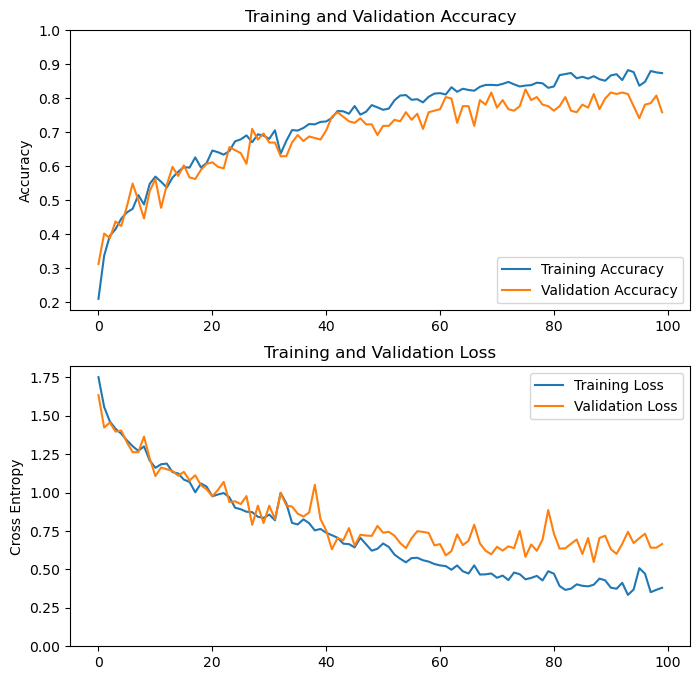

In [134]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

# evaluate

In [115]:
from tensorflow.keras.models import load_model
import keras.utils as image

In [7]:
img_path = r'C:\Users\Filip\Desktop\real_bachelor_thesis\code\test_images\test_10.jpg'
img = image.load_img(path=img_path, target_size=(img_width, img_height))
img = image.img_to_array(img, dtype=np.uint8)

img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=loaded_model.predict(img[np.newaxis, ...])

# Get the indices of the two most probable classes
top_classes_indices = np.argsort(p[0])[::-1][:1]

print("---------------")
print("Top 2 Class Indices:", top_classes_indices)
print("---------------")

# Print information for the two most probable classes
for i in top_classes_indices:
    print(f"Probability for Class {i}: {p[0][i]:.4f}")
    print(f"Classified {i}: {labels[i]}")
    print("---------------")

NameError: name 'img_width' is not defined


-------------------Individual Probability--------------------------------

CARDBOARD : 3.7 %
GLASS : 14.15 %
METAL : 1.15 %
PAPER : 17.17 %
PLASTIC : 62.63 %
TRASH : 1.2 %


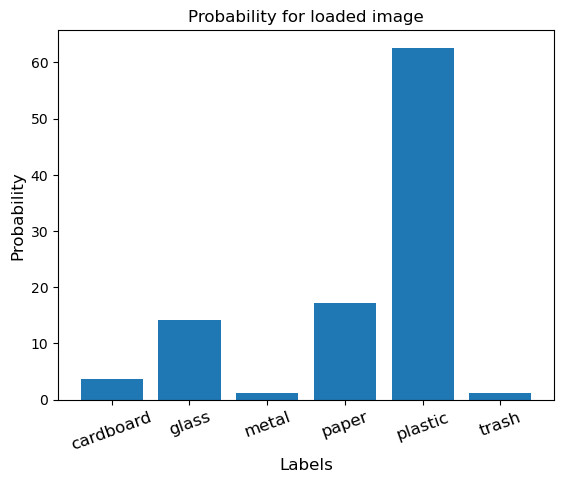

In [142]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()

In [36]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy
from sklearn.metrics import classification_report, confusion_matrix

1/1 [==============================] - 0s 474ms/step


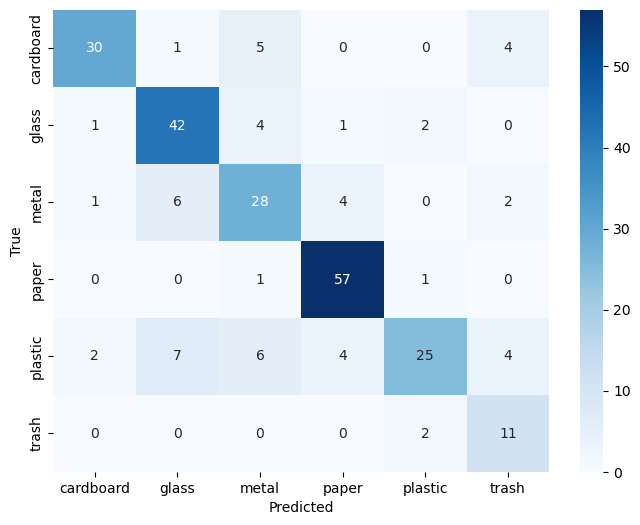

Classification Report
              precision    recall  f1-score   support

   cardboard       0.88      0.75      0.81        40
       glass       0.75      0.84      0.79        50
       metal       0.64      0.68      0.66        41
       paper       0.86      0.97      0.91        59
     plastic       0.83      0.52      0.64        48
       trash       0.52      0.85      0.65        13

    accuracy                           0.77       251
   macro avg       0.75      0.77      0.74       251
weighted avg       0.78      0.77      0.77       251



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize empty arrays to store predictions and true labels
all_predictions = []
all_true_labels = []
target_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Loop through all batches in the evaluation dataset
for i in range(test_generator.samples // test_generator.batch_size + 1):
    batch = test_generator[i]
    X, y = batch
    yhat = loaded_model.predict(X)
    y_predicted = np.argmax(yhat, axis=1)

    # Append predictions and true labels to the arrays
    all_predictions.extend(y_predicted)
    all_true_labels.extend(np.argmax(y, axis=1))  # Convert one-hot encoded labels to indices

# Compute the confusion matrix
confusion_mat = confusion_matrix(all_true_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print the classification report
print('Classification Report')
print(classification_report(all_true_labels, all_predictions, target_names=target_names))

In [9]:
# Initialize empty arrays to store predictions and true labels
all_predictions = []
all_true_labels = []

# Loop through all batches in the evaluation dataset
for i in range(len(all_data_generator1)):
    batch = all_data_generator1[i]
    X, y = batch
    yhat = loaded_model.predict(X)
    y_predicted = np.argmax(yhat, axis=1)

    # Append predictions and true labels to the arrays
    all_predictions.extend(y_predicted)
    all_true_labels.extend(np.argmax(y, axis=1))  # Convert one-hot encoded labels to indices

# Compute the confusion matrix
confusion_mat = confusion_matrix(all_true_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print the classification report
print('Classification Report')
print(classification_report(all_true_labels, all_predictions, target_names=target_names))


NameError: name 'all_data_generator1' is not defined

# evaluate the final_model.h5

Found 251 images belonging to 6 classes.
1/1 [==============================] - 0s 67ms/step
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.94      0.72      0.82        40
       glass       0.79      0.88      0.83        50
       metal       0.74      0.76      0.75        41
       paper       0.90      0.95      0.93        59
     plastic       0.79      0.71      0.75        48
       trash       0.71      0.92      0.80        13

    accuracy                           0.82       251
   macro avg       0.81      0.82      0.81       251
weighted avg       0.83      0.82      0.82       251



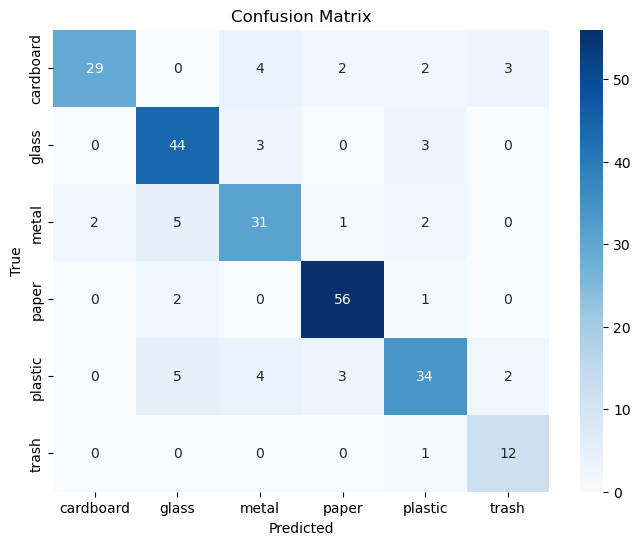

In [23]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the pre-trained model
loaded_model = load_model('final_model.h5')  # Update with the path to your saved model

# Create a new test generator for evaluation
test_generator = test.flow_from_directory(dir_path,
                                          target_size=(img_height, img_width),
                                          batch_size=batch_size,
                                          class_mode='categorical',
                                          subset='validation')

# Evaluate the model on the test set
test_generator.reset()
y_true = []
y_pred = []

for i in range(len(test_generator)):
    batch = test_generator.next()
    X, y = batch
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(loaded_model.predict(X), axis=1))

# Print the classification report
target_names = list(train_generator.class_indices.keys())
classification_rep = classification_report(y_true, y_pred, target_names=target_names)
print("Classification Report:")
print(classification_rep)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


1/1 [==============================] - 0s 285ms/step
---------------
Top 2 Class Indices: [4 3]
---------------
Probability for Class 4: 0.6263
Classified 4: plastic
---------------
Probability for Class 3: 0.1717
Classified 3: paper
---------------


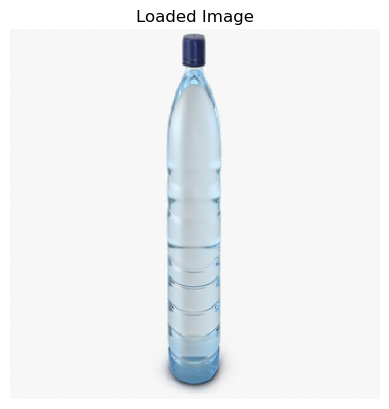

In [16]:
img_path = r'C:\Users\Filip\PycharmProjects/Clash/model/test_images/test_10.jpg'
img = image.load_img(path=img_path, target_size=(img_width, img_height))
img = image.img_to_array(img, dtype=np.uint8)

img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=loaded_model.predict(img[np.newaxis, ...])

# Get the indices of the two most probable classes
top_classes_indices = np.argsort(p[0])[::-1][:2]

print("---------------")
print("Top 2 Class Indices:", top_classes_indices)
print("---------------")

# Print information for the two most probable classes
for i in top_classes_indices:
    print(f"Probability for Class {i}: {p[0][i]:.4f}")
    print(f"Classified {i}: {labels[i]}")
    print("---------------")


-------------------Individual Probability--------------------------------

CARDBOARD : 3.7 %
GLASS : 14.15 %
METAL : 1.15 %
PAPER : 17.17 %
PLASTIC : 62.63 %
TRASH : 1.2 %


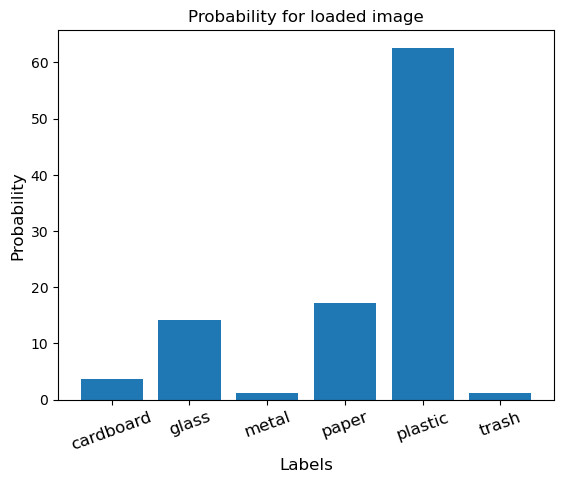

In [22]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()